## Downloading data

In [88]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

Natural gas

In [89]:
gas_raw = quandl.get("CHRIS/CME_NG1", api_key = 'ynAYQ_qMgK3dad1g26eo')
# after some preprocessing this dataframe will contain some model features and the target (y)
gas_raw.sort_index(ascending=False, inplace = True)
gas_raw

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2020-03-13,1.810,1.951,1.795,1.883,0.028,1.869,213924.0,217151.0
2020-03-12,1.883,1.883,1.750,1.819,0.037,1.841,275312.0,252093.0
2020-03-11,1.938,1.998,1.860,1.882,0.058,1.878,316875.0,300396.0
2020-03-10,1.835,1.955,1.794,1.924,0.158,1.936,345971.0,339774.0
2020-03-09,1.678,1.830,1.610,1.819,0.070,1.778,289959.0,374718.0
...,...,...,...,...,...,...,...,...
1990-04-09,1.612,1.640,1.612,1.637,NaN,1.637,37.0,145.0
1990-04-06,1.615,1.635,1.610,1.625,NaN,1.625,62.0,136.0
1990-04-05,1.615,1.635,1.610,1.615,NaN,1.615,57.0,112.0


In [90]:
isinstance(gas_raw.index, pd.DatetimeIndex)

True

In [91]:
gas_raw.index.is_all_dates # just an alternative way to check the same thing

True

In [92]:
gas_raw.isna().sum()

Open                             0
High                             0
Low                              0
Last                             0
Change                        5987
Settle                           0
Volume                           0
Previous Day Open Interest       0
dtype: int64

In [93]:
gas = gas_raw.drop(columns = ['Change', 'Last'])
gas.columns =['gas_open', 'gas_high', 'gas_low', 'gas_settle', 'gas_volume', 'gas_prevdayopeninterest']
gas.head()

,gas_open,gas_high,gas_low,gas_settle,gas_volume,gas_prevdayopeninterest
Date,,,,,,
2020-03-13,1.810,1.951,1.795,1.869,213924.0,217151.0
2020-03-12,1.883,1.883,1.750,1.841,275312.0,252093.0
2020-03-11,1.938,1.998,1.860,1.878,316875.0,300396.0
2020-03-10,1.835,1.955,1.794,1.936,345971.0,339774.0
2020-03-09,1.678,1.830,1.610,1.778,289959.0,374718.0


US 2Y interest rate

In [94]:
US_IR_raw = quandl.get("USTREASURY/YIELD", api_key = 'ynAYQ_qMgK3dad1g26eo')
US_IR_raw.sort_index(ascending = False, inplace = True)
US_IR_raw.head(3)

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2020-03-13,0.33,0.30,0.28,0.38,0.38,0.49,0.58,0.70,0.89,0.94,1.31,1.56
2020-03-12,0.41,0.33,0.33,0.37,0.39,0.50,0.58,0.66,0.82,0.88,1.27,1.49
2020-03-11,0.42,0.42,0.42,0.40,0.40,0.50,0.58,0.66,0.78,0.82,1.13,1.30


In [95]:
US_IR = US_IR_raw[['2 YR']]
US_IR.columns = ['US_rate_2y']
US_IR.head(3)

,US_rate_2y
Date,
2020-03-13,0.49
2020-03-12,0.50
2020-03-11,0.50


In [96]:
isinstance(US_IR.index, pd.DatetimeIndex)

True

S&P500

In [97]:
SP500_raw = pd.read_csv('Data/^spx_d.csv', index_col= 'Data')
SP500_raw.sort_index(ascending = False, inplace = True)
SP500_raw.index = pd.to_datetime(SP500_raw.index)
SP500_raw.head(3)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-03-13,2569.99,2711.33,2492.37,2711.02,NaN
2020-03-12,2630.86,2660.95,2478.86,2480.64,1.432305e+09
2020-03-11,2825.60,2825.60,2707.22,2741.38,1.122243e+09


In [11]:
isinstance(SP500_raw.index, pd.DatetimeIndex)

True

In [12]:
SP500 = SP500_raw[['Zamkniecie']]
SP500.columns = ['SP500_close']
SP500.head()

,SP500_close
Data,
2020-03-13,2711.02
2020-03-12,2480.64
2020-03-11,2741.38
2020-03-10,2882.23
2020-03-09,2746.56


Crude oil WTI

In [13]:
WTI_raw = quandl.get("CHRIS/CME_CL1", api_key = 'ynAYQ_qMgK3dad1g26eo')
WTI_raw.sort_index(ascending=False, inplace=True)
WTI_raw

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2020-03-13,30.77,33.87,30.33,32.97,0.23,31.73,737575.0,221602.0
2020-03-12,33.07,33.63,30.02,30.99,1.48,31.50,1008925.0,265605.0
2020-03-11,34.62,36.35,32.56,33.12,1.38,32.98,852072.0,300025.0
2020-03-10,30.37,35.02,30.20,34.85,3.23,34.36,1045913.0,341974.0
2020-03-09,32.87,34.88,27.34,30.24,10.15,31.13,1751861.0,358981.0
...,...,...,...,...,...,...,...,...
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0


In [14]:
isinstance(WTI_raw.index, pd.DatetimeIndex)

True

In [15]:
WTI_raw.isna().sum()

Open                             0
High                             0
Low                              0
Last                             0
Change                        7763
Settle                           0
Volume                           0
Previous Day Open Interest       1
dtype: int64

In [16]:
WTI = WTI_raw.drop(columns = ['Change', 'Last'])
WTI.columns = ['WTI_open', 'WTI_high', 'WTI_low', 'WTI_settle', 'WTI_volume', 'WTI_prevdayopeninterest']
WTI.head()

,WTI_open,WTI_high,WTI_low,WTI_settle,WTI_volume,WTI_prevdayopeninterest
Date,,,,,,
2020-03-13,30.77,33.87,30.33,31.73,737575.0,221602.0
2020-03-12,33.07,33.63,30.02,31.50,1008925.0,265605.0
2020-03-11,34.62,36.35,32.56,32.98,852072.0,300025.0
2020-03-10,30.37,35.02,30.20,34.36,1045913.0,341974.0
2020-03-09,32.87,34.88,27.34,31.13,1751861.0,358981.0


EUR/USD

In [17]:
EURUSD = quandl.get("ECB/EURUSD", api_key = 'ynAYQ_qMgK3dad1g26eo')
EURUSD.sort_index(ascending=False, inplace=True)
EURUSD.rename({'Value':"EurUsd"}, axis=1, inplace=True)
EURUSD

,EurUsd
Date,
2020-03-13,1.1104
2020-03-12,1.1240
2020-03-11,1.1336
2020-03-10,1.1390
2020-03-09,1.1456
...,...
1999-01-08,1.1659
1999-01-07,1.1632
1999-01-06,1.1743


In [18]:
isinstance(EURUSD.index, pd.DatetimeIndex)

True

In [19]:
EURUSD.isna().sum()

EurUsd    0
dtype: int64

Dutch gas TTF

In [20]:
TTF_raw = quandl.get("CHRIS/ICE_TFM1", api_key = 'ynAYQ_qMgK3dad1g26eo')
TTF_raw.sort_index(ascending=False, inplace=True)
TTF_raw

,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
Date,,,,,,,,,,,
2020-03-13,9.440,9.645,9.150,9.285,-0.039,9.391,27700.0,96244.0,1000.0,NaN,2255.0
2020-03-12,9.035,9.445,9.010,9.324,-0.045,9.219,28580.0,100625.0,NaN,NaN,2793.0
2020-03-11,9.000,9.450,8.950,9.369,0.376,9.219,31805.0,110586.0,600.0,NaN,910.0
2020-03-10,8.560,9.100,8.560,8.993,0.366,8.898,23005.0,113217.0,NaN,NaN,2062.0
2020-03-09,8.385,8.650,8.150,8.627,-0.020,8.481,21945.0,115896.0,NaN,NaN,1965.0
...,...,...,...,...,...,...,...,...,...,...,...
2013-10-11,27.075,27.100,27.075,27.100,-0.050,NaN,195.0,9625.0,NaN,NaN,NaN
2013-10-10,27.210,27.210,27.150,27.150,-0.138,NaN,360.0,9550.0,NaN,NaN,NaN
2013-10-09,27.330,27.350,27.250,27.288,0.038,NaN,1640.0,8360.0,NaN,NaN,NaN


In [21]:
isinstance(TTF_raw.index, pd.DatetimeIndex)

True

In [22]:
TTF = TTF_raw.iloc[:,[0, 1, 2, 3, 6, 7]]
TTF.columns = ['TTF_open', 'TTF_high', 'TTF_low', 'TTF_settle', 'TTF_volume', 'TTF_prevdayopeninterest']
TTF.head()

,TTF_open,TTF_high,TTF_low,TTF_settle,TTF_volume,TTF_prevdayopeninterest
Date,,,,,,
2020-03-13,9.440,9.645,9.15,9.285,27700.0,96244.0
2020-03-12,9.035,9.445,9.01,9.324,28580.0,100625.0
2020-03-11,9.000,9.450,8.95,9.369,31805.0,110586.0
2020-03-10,8.560,9.100,8.56,8.993,23005.0,113217.0
2020-03-09,8.385,8.650,8.15,8.627,21945.0,115896.0


In [23]:
TTF.isna().sum()

TTF_open                    7
TTF_high                    7
TTF_low                     7
TTF_settle                  0
TTF_volume                 17
TTF_prevdayopeninterest     1
dtype: int64

Gas inventory - EIA report

In [24]:
# this data is taken from http://ir.eia.gov/ngs/ngs.html
Gas_inv_raw = pd.read_excel('Data/Gas_Inventory.xlsx', skiprows=6, index_col='Week ending')
Gas_inv_raw.sort_index(ascending=False, inplace=True)
Gas_inv_raw.head()

,Source,East Region,Midwest Region,Mountain Region,Pacific Region,South Central Region,Salt,NonSalt,Total Lower 48
Week ending,,,,,,,,,
2020-03-06,EIA-912,426,529,97,200,791,235,556,2043
2020-02-28,EIA-912,451,558,101,197,784,229,555,2091
2020-02-21,EIA-912,484,591,108,196,821,244,578,2200
2020-02-14,EIA-912,527,639,117,198,861,257,605,2343
2020-02-07,EIA-912,569,694,126,202,903,269,634,2494


In [25]:
Gas_inv = Gas_inv_raw.copy()
Gas_inv['Report_date'] = Gas_inv.index + pd.DateOffset(days=6) # the report is published
# 6 days after the week it describes (therefore date needs to be shifted so there's no
# data leak)
Gas_inv.set_index(['Report_date'], inplace=True)
Gas_inv = Gas_inv[['Total Lower 48']]
Gas_inv.columns = ['Storage']
Gas_inv

,Storage
Report_date,
2020-03-12,2043
2020-03-05,2091
2020-02-27,2200
2020-02-20,2343
2020-02-13,2494
...,...
2010-02-04,2406
2010-01-28,2521
2010-01-21,2607


In [26]:
Gas_inv = Gas_inv.resample('d').ffill()
Gas_inv.tail(10)

,Storage
Report_date,
2020-03-03,2200
2020-03-04,2200
2020-03-05,2091
2020-03-06,2091
2020-03-07,2091
2020-03-08,2091
2020-03-09,2091
2020-03-10,2091
2020-03-11,2091


US GDP

In [27]:
GDP = quandl.get("FRED/GDPC1", api_key = 'ynAYQ_qMgK3dad1g26eo')
GDP.sort_index(ascending=False, inplace=True)
GDP

,Value
Date,
2019-10-01,19220.490
2019-07-01,19121.112
2019-04-01,19021.860
2019-01-01,18927.281
2018-10-01,18783.548
...,...
1948-01-01,2086.017
1947-10-01,2055.103
1947-07-01,2023.452


In [28]:
isinstance(GDP.index, pd.DatetimeIndex)

True

In [29]:
GDP.isna().sum()

Value    0
dtype: int64

US average monthly temperatures

In [30]:
temps_avg = pd.read_pickle('Data/temps_pca_rep.pkl')
temps_avg

,US_temp
2010-01-01,149.463355
2010-01-02,149.463355
2010-01-03,149.463355
2010-01-04,149.463355
2010-01-05,149.463355
...,...
2029-11-27,62.166491
2029-11-28,62.166491
2029-11-29,62.166491
2029-11-30,62.166491


## Data preprocessing

Natural gas

In [98]:
gas.head()

,gas_open,gas_high,gas_low,gas_settle,gas_volume,gas_prevdayopeninterest
Date,,,,,,
2020-03-13,1.810,1.951,1.795,1.869,213924.0,217151.0
2020-03-12,1.883,1.883,1.750,1.841,275312.0,252093.0
2020-03-11,1.938,1.998,1.860,1.878,316875.0,300396.0
2020-03-10,1.835,1.955,1.794,1.936,345971.0,339774.0
2020-03-09,1.678,1.830,1.610,1.778,289959.0,374718.0


In [99]:
gas['gas_daily_change'] = gas.gas_settle/gas.gas_settle.shift(-1)-1
# gas['gas_interest_daily_change'] = gas.gas_prevdayopeninterest/gas.gas_prevdayopeninterest.shift(-1)-1
gas['gas_volatility'] = (gas.gas_high-gas.gas_low)/gas.gas_settle
gas['gas_daily_gap'] = (gas.gas_open-gas.gas_settle.shift(-1))/gas.gas_settle.shift(-1)
gas['gas_target'] = np.where(gas['gas_daily_change']>=0, 1, 0)
gas['gas_target'] = gas['gas_target'].shift(1)
gas.head()

,gas_open,gas_high,gas_low,gas_settle,gas_volume,gas_prevdayopeninterest,gas_daily_change,gas_volatility,gas_daily_gap,gas_target
Date,,,,,,,,,,
2020-03-13,1.810,1.951,1.795,1.869,213924.0,217151.0,0.015209,0.083467,-0.016839,NaN
2020-03-12,1.883,1.883,1.750,1.841,275312.0,252093.0,-0.019702,0.072243,0.002662,1.0
2020-03-11,1.938,1.998,1.860,1.878,316875.0,300396.0,-0.029959,0.073482,0.001033,0.0
2020-03-10,1.835,1.955,1.794,1.936,345971.0,339774.0,0.088864,0.083161,0.032058,0.0
2020-03-09,1.678,1.830,1.610,1.778,289959.0,374718.0,0.040984,0.123735,-0.017564,1.0


In [100]:
gas_pr = gas.drop(columns=['gas_open', 'gas_high', 'gas_low',
                           'gas_settle', 'gas_volume', 'gas_prevdayopeninterest'])
gas_pr.head(10)

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target
Date,,,,
2020-03-13,0.015209,0.083467,-0.016839,NaN
2020-03-12,-0.019702,0.072243,0.002662,1.0
2020-03-11,-0.029959,0.073482,0.001033,0.0
2020-03-10,0.088864,0.083161,0.032058,0.0
2020-03-09,0.040984,0.123735,-0.017564,1.0
2020-03-06,-0.036117,0.036300,-0.002822,1.0
2020-03-05,-0.030104,0.051354,0.001095,0.0
2020-03-04,0.015000,0.032841,0.002778,0.0
2020-03-03,0.025057,0.046111,0.003986,1.0


In [101]:
gas_pr.shape

(7509, 4)

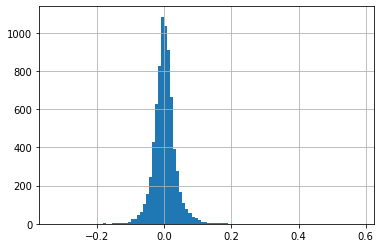

In [102]:
(gas_pr.gas_daily_change).hist(bins=100)
plt.show()

In [103]:
gas_pr[gas_pr.isna().any(axis=1)]

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target
Date,,,,
2020-03-13,0.015209,0.083467,-0.016839,NaN
1990-04-03,NaN,0.045872,NaN,0.0


In [104]:
gas_pr.dropna(inplace=True)
gas_pr.shape

(7507, 4)

In [105]:
gas_pr.gas_daily_change.quantile(0.1)

-0.0359885374167183

US 2Y interest rate

In [106]:
US_IR

,US_rate_2y
Date,
2020-03-13,0.49
2020-03-12,0.50
2020-03-11,0.50
2020-03-10,0.50
2020-03-09,0.38
...,...
1990-01-08,7.90
1990-01-05,7.90
1990-01-04,7.92


In [107]:
US_IR['rate_2y_daily_change'] = US_IR.US_rate_2y/US_IR.US_rate_2y.shift(-1)-1
US_IR

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,US_rate_2y,rate_2y_daily_change
Date,,
2020-03-13,0.49,-0.020000
2020-03-12,0.50,0.000000
2020-03-11,0.50,0.000000
2020-03-10,0.50,0.315789
2020-03-09,0.38,-0.224490
...,...,...
1990-01-08,7.90,0.000000
1990-01-05,7.90,-0.002525
1990-01-04,7.92,-0.002519


In [41]:
US_IR_pr = pd.DataFrame(US_IR.rate_2y_daily_change)
US_IR_pr.head()

,rate_2y_daily_change
Date,
2020-03-13,-0.020000
2020-03-12,0.000000
2020-03-11,0.000000
2020-03-10,0.315789
2020-03-09,-0.224490


C:\Users\PC\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


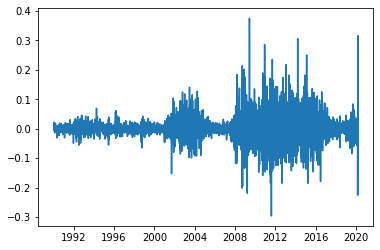

In [42]:
plt.plot(US_IR['rate_2y_daily_change'])
plt.show()

S&P500

In [43]:
SP500

,SP500_close
Data,
2020-03-13,2711.02
2020-03-12,2480.64
2020-03-11,2741.38
2020-03-10,2882.23
2020-03-09,2746.56
...,...
2000-05-05,1432.63
2000-05-04,1409.38
2000-05-03,1415.10


In [44]:
SP500['SP500_daily_change'] = SP500.SP500_close/SP500.SP500_close.shift(-1)-1
SP500

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,SP500_close,SP500_daily_change
Data,,
2020-03-13,2711.02,0.092871
2020-03-12,2480.64,-0.095113
2020-03-11,2741.38,-0.048868
2020-03-10,2882.23,0.049396
2020-03-09,2746.56,-0.075970
...,...,...
2000-05-05,1432.63,0.016497
2000-05-04,1409.38,-0.004042
2000-05-03,1415.10,-0.021430


In [45]:
SP500_pr = SP500.drop(columns=['SP500_close'])
SP500_pr.head()

,SP500_daily_change
Data,
2020-03-13,0.092871
2020-03-12,-0.095113
2020-03-11,-0.048868
2020-03-10,0.049396
2020-03-09,-0.075970


Crude oil WTI

In [46]:
WTI

,WTI_open,WTI_high,WTI_low,WTI_settle,WTI_volume,WTI_prevdayopeninterest
Date,,,,,,
2020-03-13,30.77,33.87,30.33,31.73,737575.0,221602.0
2020-03-12,33.07,33.63,30.02,31.50,1008925.0,265605.0
2020-03-11,34.62,36.35,32.56,32.98,852072.0,300025.0
2020-03-10,30.37,35.02,30.20,34.36,1045913.0,341974.0
2020-03-09,32.87,34.88,27.34,31.13,1751861.0,358981.0
...,...,...,...,...,...,...
1983-04-06,29.90,29.92,29.65,29.90,392.0,640.0
1983-04-05,29.50,29.80,29.50,29.71,175.0,623.0
1983-04-04,29.30,29.70,29.29,29.44,156.0,583.0


In [47]:
WTI['WTI_daily_change'] = WTI.WTI_settle/WTI.WTI_settle.shift(-1)-1
WTI

,WTI_open,WTI_high,WTI_low,WTI_settle,WTI_volume,WTI_prevdayopeninterest,WTI_daily_change
Date,,,,,,,
2020-03-13,30.77,33.87,30.33,31.73,737575.0,221602.0,0.007302
2020-03-12,33.07,33.63,30.02,31.50,1008925.0,265605.0,-0.044876
2020-03-11,34.62,36.35,32.56,32.98,852072.0,300025.0,-0.040163
2020-03-10,30.37,35.02,30.20,34.36,1045913.0,341974.0,0.103758
2020-03-09,32.87,34.88,27.34,31.13,1751861.0,358981.0,-0.245882
...,...,...,...,...,...,...,...
1983-04-06,29.90,29.92,29.65,29.90,392.0,640.0,0.006395
1983-04-05,29.50,29.80,29.50,29.71,175.0,623.0,0.009171
1983-04-04,29.30,29.70,29.29,29.44,156.0,583.0,0.005121


In [48]:
WTI_pr = pd.DataFrame(WTI.WTI_daily_change)
WTI_pr.head()

,WTI_daily_change
Date,
2020-03-13,0.007302
2020-03-12,-0.044876
2020-03-11,-0.040163
2020-03-10,0.103758
2020-03-09,-0.245882


EURUSD

In [49]:
EURUSD

,EurUsd
Date,
2020-03-13,1.1104
2020-03-12,1.1240
2020-03-11,1.1336
2020-03-10,1.1390
2020-03-09,1.1456
...,...
1999-01-08,1.1659
1999-01-07,1.1632
1999-01-06,1.1743


Dutch gas TTF

Since the TTF gas is traded on the european exchange, its quotation is in Euros. I'd like to compare it to the US gas prices so I'm going to calculate TTF's value in US dollars.

In [50]:
TTF

,TTF_open,TTF_high,TTF_low,TTF_settle,TTF_volume,TTF_prevdayopeninterest
Date,,,,,,
2020-03-13,9.440,9.645,9.150,9.285,27700.0,96244.0
2020-03-12,9.035,9.445,9.010,9.324,28580.0,100625.0
2020-03-11,9.000,9.450,8.950,9.369,31805.0,110586.0
2020-03-10,8.560,9.100,8.560,8.993,23005.0,113217.0
2020-03-09,8.385,8.650,8.150,8.627,21945.0,115896.0
...,...,...,...,...,...,...
2013-10-11,27.075,27.100,27.075,27.100,195.0,9625.0
2013-10-10,27.210,27.210,27.150,27.150,360.0,9550.0
2013-10-09,27.330,27.350,27.250,27.288,1640.0,8360.0


In [51]:
TTF['TTF_daily_change'] = TTF.TTF_settle/TTF.TTF_settle.shift(-1)-1
TTF

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TTF_open,TTF_high,TTF_low,TTF_settle,TTF_volume,TTF_prevdayopeninterest,TTF_daily_change
Date,,,,,,,
2020-03-13,9.440,9.645,9.150,9.285,27700.0,96244.0,-0.004183
2020-03-12,9.035,9.445,9.010,9.324,28580.0,100625.0,-0.004803
2020-03-11,9.000,9.450,8.950,9.369,31805.0,110586.0,0.041810
2020-03-10,8.560,9.100,8.560,8.993,23005.0,113217.0,0.042425
2020-03-09,8.385,8.650,8.150,8.627,21945.0,115896.0,-0.002313
...,...,...,...,...,...,...,...
2013-10-11,27.075,27.100,27.075,27.100,195.0,9625.0,-0.001842
2013-10-10,27.210,27.210,27.150,27.150,360.0,9550.0,-0.005057
2013-10-09,27.330,27.350,27.250,27.288,1640.0,8360.0,0.001394


In [52]:
TTF_pr = pd.DataFrame(TTF.TTF_daily_change)
TTF_pr.head()

,TTF_daily_change
Date,
2020-03-13,-0.004183
2020-03-12,-0.004803
2020-03-11,0.041810
2020-03-10,0.042425
2020-03-09,-0.002313


Gas inventory - EIA report

In [53]:
Gas_inv.head()

,Storage
Report_date,
2010-01-07,3117
2010-01-08,3117
2010-01-09,3117
2010-01-10,3117
2010-01-11,3117


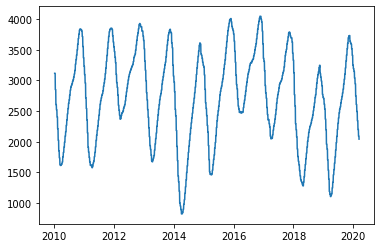

In [54]:
plt.plot(Gas_inv)
plt.show()

US GDP

In [55]:
GDP

,Value
Date,
2019-10-01,19220.490
2019-07-01,19121.112
2019-04-01,19021.860
2019-01-01,18927.281
2018-10-01,18783.548
...,...
1948-01-01,2086.017
1947-10-01,2055.103
1947-07-01,2023.452


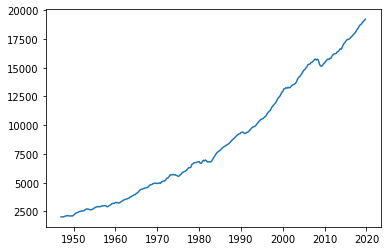

In [56]:
plt.plot(GDP)
plt.show()

In [57]:
GDP['GDP_quarterly_change'] = GDP.Value/GDP.Value.shift(-1)-1
GDP

,Value,GDP_quarterly_change
Date,,
2019-10-01,19220.490,0.005197
2019-07-01,19121.112,0.005218
2019-04-01,19021.860,0.004997
2019-01-01,18927.281,0.007652
2018-10-01,18783.548,0.002713
...,...,...
1948-01-01,2086.017,0.015043
1947-10-01,2055.103,0.015642
1947-07-01,2023.452,-0.002065


In [58]:
GDP_pr = pd.DataFrame(GDP.GDP_quarterly_change)
GDP_pr.head()

,GDP_quarterly_change
Date,
2019-10-01,0.005197
2019-07-01,0.005218
2019-04-01,0.004997
2019-01-01,0.007652
2018-10-01,0.002713


In [59]:
GDP_pr_res = GDP_pr.resample('d').ffill()
# ffill() method 'knows' that index is a datetime and fills missing values the right way
# (with the values that were observed earlier in time), no matter how dataframe is sorted
GDP_pr_res.tail()

,GDP_quarterly_change
Date,
2019-09-27,0.005218
2019-09-28,0.005218
2019-09-29,0.005218
2019-09-30,0.005218
2019-10-01,0.005197


Concatenating all dataframes into one that will be used in the model fitting

In [108]:
X = pd.merge(gas_pr, US_IR_pr, left_index=True, right_index=True, how='left')

for df in [SP500_pr, WTI_pr, EURUSD, TTF_pr, Gas_inv, GDP_pr, temps_avg]:
    X = pd.merge(X, df, left_index=True, right_index=True, how='left')
    
X.head(20)

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp
Date,,,,,,,,,,,,
2020-03-12,-0.019702,0.072243,0.002662,1.0,0.000000,-0.095113,-0.044876,1.1240,-0.004803,2043.0,NaN,75.360065
2020-03-11,-0.029959,0.073482,0.001033,0.0,0.000000,-0.048868,-0.040163,1.1336,0.041810,2091.0,NaN,75.360065
2020-03-10,0.088864,0.083161,0.032058,0.0,0.315789,0.049396,0.103758,1.1390,0.042425,2091.0,NaN,75.360065
2020-03-09,0.040984,0.123735,-0.017564,1.0,-0.224490,-0.075970,-0.245882,1.1456,-0.002313,2091.0,NaN,75.360065
2020-03-06,-0.036117,0.036300,-0.002822,1.0,-0.169492,-0.017054,-0.100654,1.1336,-0.022827,2091.0,NaN,75.360065
2020-03-05,-0.030104,0.051354,0.001095,0.0,-0.119403,-0.033922,-0.018811,1.1187,-0.007069,2091.0,NaN,75.360065
2020-03-04,0.015000,0.032841,0.002778,0.0,-0.056338,0.042203,-0.008478,1.1125,-0.028029,2200.0,NaN,75.360065
2020-03-03,0.025057,0.046111,0.003986,1.0,-0.154762,-0.028108,0.009198,1.1117,0.031732,2200.0,NaN,75.360065
2020-03-02,0.042755,0.048405,0.006532,1.0,-0.023256,0.046039,0.044459,1.1122,0.001465,2200.0,NaN,75.360065


In [109]:
fill_with_bfill = ['Storage', 'GDP_quarterly_change', 'EurUsd']
fill_with_0 = ['rate_2y_daily_change', 'SP500_daily_change', 'WTI_daily_change', 'TTF_daily_change']

for column in fill_with_bfill:
    
    X[column].bfill(inplace=True)

    
for column in fill_with_0:
    
    X[column].fillna(0, inplace=True)


In [110]:
X

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp
Date,,,,,,,,,,,,
2020-03-12,-0.019702,0.072243,0.002662,1.0,0.000000,-0.095113,-0.044876,1.1240,-0.004803,2043.0,0.005197,75.360065
2020-03-11,-0.029959,0.073482,0.001033,0.0,0.000000,-0.048868,-0.040163,1.1336,0.041810,2091.0,0.005197,75.360065
2020-03-10,0.088864,0.083161,0.032058,0.0,0.315789,0.049396,0.103758,1.1390,0.042425,2091.0,0.005197,75.360065
2020-03-09,0.040984,0.123735,-0.017564,1.0,-0.224490,-0.075970,-0.245882,1.1456,-0.002313,2091.0,0.005197,75.360065
2020-03-06,-0.036117,0.036300,-0.002822,1.0,-0.169492,-0.017054,-0.100654,1.1336,-0.022827,2091.0,0.005197,75.360065
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-04-10,-0.010385,0.010494,-0.007330,0.0,0.000000,0.000000,-0.041215,NaN,0.000000,NaN,NaN,NaN
1990-04-09,0.007385,0.017104,-0.008000,0.0,0.002347,0.000000,-0.037076,NaN,0.000000,NaN,NaN,NaN
1990-04-06,0.006192,0.015385,0.000000,1.0,-0.002342,0.000000,-0.014411,NaN,0.000000,NaN,NaN,NaN


I'm going to use last 10 years (2010-today) to prepare a model - as financial markets evolve, past behaviour might be not good indicator of the future price movements and using data that's too old might intensify this issue.

In [111]:
X = X[X.index.year >= 2010]

In [112]:
X.isna().sum()

gas_daily_change        0
gas_volatility          0
gas_daily_gap           0
gas_target              0
rate_2y_daily_change    0
SP500_daily_change      0
WTI_daily_change        0
EurUsd                  0
TTF_daily_change        0
Storage                 2
GDP_quarterly_change    0
US_temp                 0
dtype: int64

There are still null values in the Storage column - probably at the very beginning (where bfill didn't have any effect) - let's see:

In [113]:
X[X.Storage.isna()]

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp
Date,,,,,,,,,,,,
2010-01-06,0.021244,0.070727,-0.032971,0.0,0.00000,0.000546,0.017243,1.4350,0.0,NaN,0.010984,149.463355
2010-01-04,0.055994,0.032121,0.023869,1.0,-0.04386,0.016043,0.027092,1.4389,0.0,NaN,0.010984,149.463355


That's exactly the case, so I'll just remove these 2 days from my dataset. I'll do it later though as I'm going to add some features lags that will also cause null values.

In [115]:
X['Weekday'] = X.index.weekday_name
X = pd.concat([X, pd.get_dummies(X.Weekday)], axis=1)
X.drop(columns=['Weekday'], inplace = True)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
X['filling'] = [x in [11, 12, 1, 2, 3] for x in X.index.month]

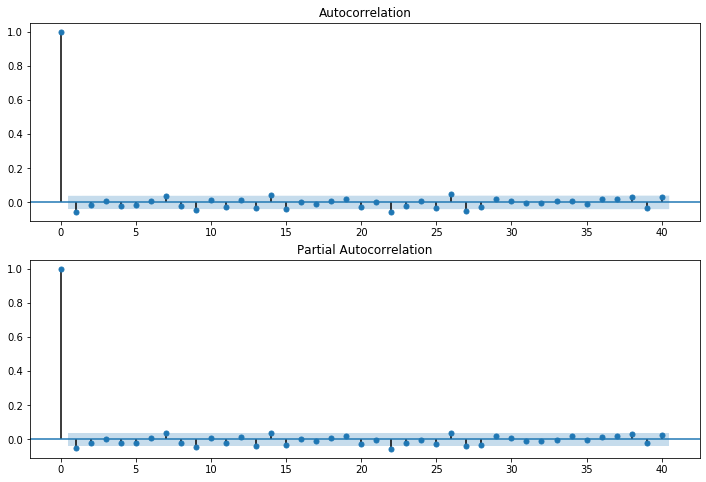

In [117]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(X.gas_daily_change, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(X.gas_daily_change, lags=40, ax=ax2)
plt.show()

In [118]:
PACF = pacf(X.gas_daily_change)

for i in enumerate(PACF):
    if abs(i[1]) > 0.05:
        print(f'{i[0]}:  {i[1].round(2)}')

0:  1.0
1:  -0.05
22:  -0.06


PACF function tells us that 1st and 22nd lag of the gas daily change has some statistically significant correlation. 1st lag seems to have some sense, but 22nd lag is surprising, nevertheless I'll add this feature to the dataframe (1st lag is already included as gas_daily_change column - it will be used to predict the next day price move).

In [119]:
X['gas_daily_change_lag22'] = X.gas_daily_change.shift(-21)
X.head()

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,,
2020-03-12,-0.019702,0.072243,0.002662,1.0,0.000000,-0.095113,-0.044876,1.1240,-0.004803,2043.0,0.005197,75.360065,0,0,1,0,0,True,0.012458
2020-03-11,-0.029959,0.073482,0.001033,0.0,0.000000,-0.048868,-0.040163,1.1336,0.041810,2091.0,0.005197,75.360065,0,0,0,0,1,True,-0.049516
2020-03-10,0.088864,0.083161,0.032058,0.0,0.315789,0.049396,0.103758,1.1390,0.042425,2091.0,0.005197,75.360065,0,0,0,1,0,True,-0.002148
2020-03-09,0.040984,0.123735,-0.017564,1.0,-0.224490,-0.075970,-0.245882,1.1456,-0.002313,2091.0,0.005197,75.360065,0,1,0,0,0,True,0.000537
2020-03-06,-0.036117,0.036300,-0.002822,1.0,-0.169492,-0.017054,-0.100654,1.1336,-0.022827,2091.0,0.005197,75.360065,1,0,0,0,0,True,-0.005876


In [130]:
X.dropna(inplace = True)
X.tail()

,gas_daily_change,gas_volatility,gas_daily_gap,gas_target,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,,
2010-02-10,0.000378,0.026455,0.010964,1.0,0.083333,-0.002233,0.010441,1.3740,0.0,2406.0,0.010984,126.992186,0,0,0,0,1,True,-0.051313
2010-02-09,-0.020552,0.038563,0.003518,1.0,0.063291,0.013040,0.025873,1.3760,0.0,2406.0,0.010984,126.992186,0,0,0,1,0,True,-0.009817
2010-02-08,-0.020671,0.052583,0.015775,0.0,0.025974,-0.008863,0.009833,1.3675,0.0,2406.0,0.010984,126.992186,0,1,0,0,0,True,-0.033783
2010-02-05,0.018279,0.038985,0.012740,0.0,-0.037500,0.002897,-0.026661,1.3691,0.0,2406.0,0.010984,126.992186,1,0,0,0,0,True,0.021244
2010-02-04,-0.000554,0.050406,-0.002399,1.0,-0.090909,-0.031141,-0.049883,1.3847,0.0,2406.0,0.010984,126.992186,0,0,1,0,0,True,0.055994


In [131]:
y = X.gas_target

In [132]:
X = X.drop(columns=['gas_target'])
X.head()

,gas_daily_change,gas_volatility,gas_daily_gap,rate_2y_daily_change,SP500_daily_change,WTI_daily_change,EurUsd,TTF_daily_change,Storage,GDP_quarterly_change,US_temp,Friday,Monday,Thursday,Tuesday,Wednesday,filling,gas_daily_change_lag22
Date,,,,,,,,,,,,,,,,,,
2020-03-12,-0.019702,0.072243,0.002662,0.000000,-0.095113,-0.044876,1.1240,-0.004803,2043.0,0.005197,75.360065,0,0,1,0,0,True,0.012458
2020-03-11,-0.029959,0.073482,0.001033,0.000000,-0.048868,-0.040163,1.1336,0.041810,2091.0,0.005197,75.360065,0,0,0,0,1,True,-0.049516
2020-03-10,0.088864,0.083161,0.032058,0.315789,0.049396,0.103758,1.1390,0.042425,2091.0,0.005197,75.360065,0,0,0,1,0,True,-0.002148
2020-03-09,0.040984,0.123735,-0.017564,-0.224490,-0.075970,-0.245882,1.1456,-0.002313,2091.0,0.005197,75.360065,0,1,0,0,0,True,0.000537
2020-03-06,-0.036117,0.036300,-0.002822,-0.169492,-0.017054,-0.100654,1.1336,-0.022827,2091.0,0.005197,75.360065,1,0,0,0,0,True,-0.005876


In [133]:
X.to_pickle('Data/X.pkl')
y.to_pickle('Data/y.pkl')

In [75]:
# import cmath

In [76]:
# list(X.index.month.unique())

In [77]:
# coordinates = {}

# for i in list(X.index.month.unique()):
#     x = math.cos(math.radians(30*i))
#     y = math.sin(math.radians(30*i))
#     z = complex(x, y)
#     coordinates[i] = z
    
#     print(i, z)

In [78]:
# X_coord = [x.real for x in coordinates.values()]
# Y_coord = [x.imag for x in coordinates.values()]
# plt.scatter(X_coord, Y_coord)
# plt.show()

In [79]:
# X['Month'] = X.index.month
# X['Month_complex'] = [coordinates[x] for x in X.index.month]
# # X.Month = X.Month.apply(lambda x: coordinates[x])

In [80]:
# X.index.month.nunique()

In [81]:
# X.Month_complex.unique()

In [82]:
# for i in list(X.index.month.unique()):
#     print(coordinates[i])

In [83]:
# X.Month.value_counts()

In [84]:
# coordinates[3]

In [85]:
# X['gas_daily_change'].groupby([X.index.month]).count()

Święta w dowolnym państwie: https://www.geeksforgeeks.org/python-holidays-library/

In [86]:
# from datetime import date 
# import holidays

In [87]:
# swieta = []
# for ptr in holidays.US(years = 2018).items(): 
#     swieta.append(ptr)
# swieta